In [149]:
from ultralytics import YOLO
import cv2

model = YOLO('/home/users/maali/Computer_vision_SOC/runs/detect/train2/weights/best.pt')

image = cv2.imread("/home/users/maali/Computer_vision_SOC/data/images/misses/train/images/background_augmented_img005677.jpg")

res = model.predict(
    source=image,
    save=True,
    project='/home/users/maali/Computer_vision_SOC/runs/detect/predictions',
    max_det = 1,
)


0: 256x256 (no detections), 9.0ms
Speed: 0.8ms preprocess, 9.0ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 256)
Results saved to /home/users/maali/Computer_vision_SOC/runs/detect/predictions/predict31


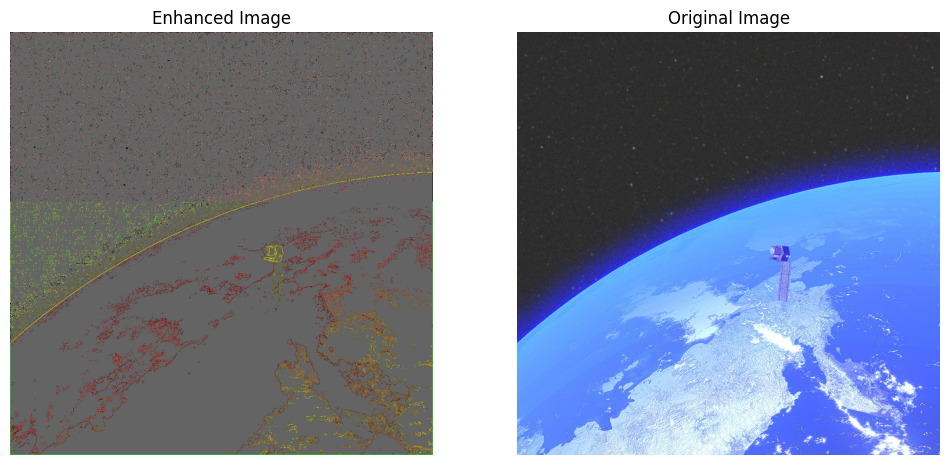

In [148]:
from PIL import Image, ImageEnhance,ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import cv2


def color_half_image(image):
    
    width, height = image.size
    
    data = list(image.getdata())
    # Create a new data array
    new_data = []
    for y in range(height):
        for x in range(width):
            # Calculate the index in the linear array
            index = y * width + x
            # Get the RGB values of the current pixel
            item = data[index]

            # Change colors only for the bottom half of the image
            if y < height / 2.5:
                # Change all white (also shades of whites)
                if item[0] >= 90 and item[1] >= 90 and item[2] >= 90:
                    new_data.append((100,100,100))  # New color is like (R,G,B)

                elif item[0] <= 110 and item[1] <= 110 and item[2] <= 110:
                    new_data.append((205,92,92))  #
                
                elif item[0] >= 30 and item[1] >= 30 and item[2] >= 30:
                    new_data.append((255,215,0))  # New color is like (R,G,B)
                
                elif item[0] == 0 and item[1] == 255 and item[2] == 0:
                    new_data.append((0,0,0))  # New color is like (R,G,B)
                else:
                    new_data.append(item)  # Original color
            else:
                # If it's the top half, keep the original colors
                # Change all white (also shades of whites)
                if item[0] >= 90 and item[1] >= 90 and item[2] >= 90:
                    new_data.append((100,100,100))  # New color is like (R,G,B)
                
                elif item[0] >= 30 and item[1] >= 30 and item[2] >= 30:
                    new_data.append((255,215,0))  # New color is like (R,G,B)
                
                
                elif item[0] == 0 and item[1] == 255 and item[2] == 0:
                    new_data.append((0,255,0))  # New color is like (R,G,B)
                else:
                    new_data.append(item)  # Original color
               
    # Create a new image with the modified data
    new_image = Image.new("RGB", (width, height))
    new_image.putdata(new_data)

    return new_image


def paste_on_white_background(image_path):
    # Open the input image
    image = Image.open(image_path)
   
    # Enhance brightness
    enhancer = ImageEnhance.Brightness(image)
    enhanced_img = enhancer.enhance(2)
    
    # Enhance contrast
    contrast_enhancer = ImageEnhance.Contrast(enhanced_img)
    image_with_enhanced_contrast = contrast_enhancer.enhance(1)  # contrast_factor > 1 to increase contrast

    # Enhance edges
    sharperner = ImageEnhance.Sharpness(image_with_enhanced_contrast)
    image_sharpened = sharperner.enhance(0.5)  # 
    
    image_with_edges = image_sharpened.filter(ImageFilter.FIND_EDGES)

    # Convert to NumPy array for inversion
    background_np = np.array(image_with_edges)
    
    # Invert the colors
    #background_np = np.clip(20 - background_np, 0, 255)  # Ensure values are within [0,255]
    
    # Convert back to a PIL Image
    background_inverted = Image.fromarray(background_np.astype(np.uint8))

    # Load the image data into an array
    data = background_inverted.getdata()

    # Create a new data array
    new_data = []
    for item in data:
        # Change all white (also shades of whites)
        if item[0] >= 90 and item[1] >= 90 and item[2] >= 90:
            # Change white to the new color
            new_data.append((0,255,0))  # New color is like (R,G,B)
        
        # Change all black (also shades of black)
        elif item[0] <= 80 and item[1] <= 80 and item[2] <= 80:
            # Change white to the new color
            new_data.append((128,128,128))  # New color is like (R,G,B)
        
        # Change all blue (also shades of blues)
        elif item[2] > item[1] + 50 and item[2] > item[0] + 50:
            # Change blue to the new color (for example, a shade of yellow)
            new_data.append((0,0,0))  # New color is like (R,G,B)
        else:
            new_data.append(item)  # Original color

    # Update image data
    background_inverted.putdata(new_data)
    
    im = color_half_image(background_inverted)
    
    return im


path = "/home/users/maali/Computer_vision_SOC/data/images/test/img049237.jpg"
enhanced_image = paste_on_white_background(path)

# Display the enhanced image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Enhanced Image")
plt.imshow(enhanced_image)  # Removed cmap for RGB image
plt.axis('off')

# Read the original image and convert from BGR to RGB
original_image = cv2.imread(path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.subplot(1, 2, 2)
plt.title("Original Image")
plt.imshow(original_image)  # Removed cmap for RGB image
plt.axis('off')

enhanced_image.save('/home/users/maali/Computer_vision_SOC/output_image.jpg')

In [ ]:
def invert_and_sharpen_colors(image_path):
    # Load the image in BGR format
    image = cv2.imread(image_path)

    # Ensure the image exists
    if image is None:
        print("Image not found at path:", image_path)
        return None

    # Invert the color by subtracting image data from the maximum value (255)
    inverted_image = 255 - edge_enhanced_image

    # Sharpen the inverted image
    sharpened_inverted_image = sharpen_image(inverted_image)

    return sharpened_inverted_image

/home/users/maali/Computer_vision_SOC/patches/patch3.jpg


True

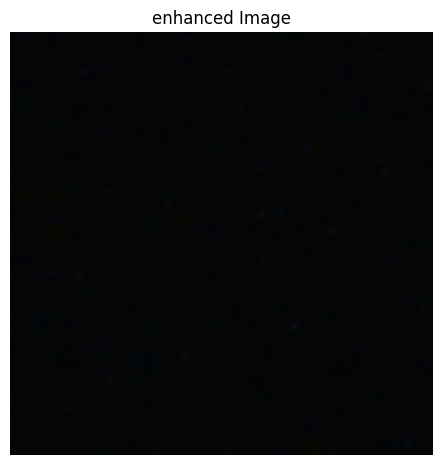

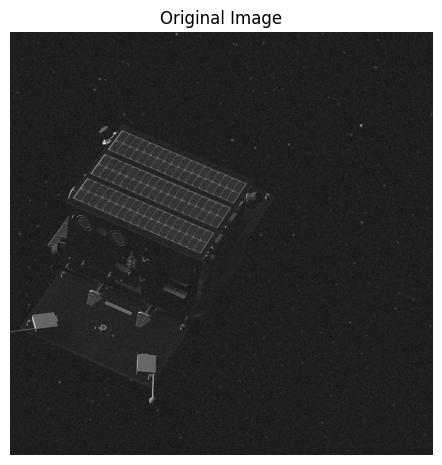

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def create_dark_image(image_path, patch_image_path,transparency=0.9,brightness_factor=0.15, contrast_factor=1.0):
    """
    Create a dark counterpart of a well-lit image.

    :param image_path: Path to the source image.
    :param brightness_factor: Factor to reduce brightness (0 < brightness_factor < 1).
    :param contrast_factor: Factor to adjust contrast (0 < contrast_factor).
    """
    # Read the image
    image = cv2.imread(image_path)

    # Read the patch
    patch_image = cv2.imread(patch_image_path)

    # Resize the patch to match the main image size
    patch_image = cv2.resize(patch_image, (image.shape[1], image.shape[0]))

    # Overlay the patch onto the main image with the given transparency
    new_img = cv2.addWeighted(image, 1 - transparency, patch_image, transparency, 0)

    # Convert to YUV color space
    yuv_image = cv2.cvtColor(new_img, cv2.COLOR_BGR2YUV)

    # Split into channels
    y, u, v = cv2.split(yuv_image)

    # Reduce brightness
    y = cv2.multiply(y, brightness_factor)

    # Adjust contrast
    y = cv2.multiply(y, contrast_factor)

    # Merge channels back
    yuv_image = cv2.merge([y, u, v])
    
    # Convert back to BGR color space
    dark_image = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2BGR)

    return dark_image

path = "/home/users/maali/Computer_vision_SOC/data/images/train/img000033.jpg"

patch_path = ["/home/users/maali/Computer_vision_SOC/patches/patch2.jpg",
              "/home/users/maali/Computer_vision_SOC/patches/patch.jpg",
              "/home/users/maali/Computer_vision_SOC/patches/patch3.jpg"]

choice = np.random.choice(patch_path)
print(choice)
enhanced_image = create_dark_image(path,choice)

# Display the original and enhanced images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("enhanced Image")
plt.imshow(enhanced_image, cmap='gray')
plt.axis('off')

image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# Display the original and enhanced images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

cv2.imwrite('/home/users/maali/Computer_vision_SOC/output_image.jpg', enhanced_image)

# MISC

In [ ]:
import pandas as pd
import numpy as np

def make_submisson(df, file_path, index=False):
    try:
        df['filename'] = df['filename'].str.replace('.jpg', '.png', regex=False)
        df['bbox'] = df['bbox'].str.replace('no detection', np.nan, regex=False)
        df['class'] = df['class'].str.replace('no detection', np.nan, regex=False)
        df.to_csv(file_path, index=index)
        print(f"DataFrame is saved successfully to {file_path}")
    except Exception as e:
        print(f"An error occurred while saving the DataFrame to CSV: {e}")


# predictions_df = pd.read_csv('/home/users/maali/Computer_vision_SOC/performanceResults/submission2.csv')

make_submisson(predictions_df, '/home/users/maali/Computer_vision_SOC/performanceResults/submission.csv')


In [ ]:
import pandas as pd 

def collect_positives(true_df, predictions_df,iou_scores,iou_threshold=0.5):

        df = pd.merge(true_df, predictions_df, on='filename')
        df['ious'] = iou_scores

        detections_df = df[df['bbox_y'] != 'no detection']

        false_positives = detections_df[(detections_df['ious'] > iou_threshold) & (detections_df['class_x'] == detections_df['class_y'])]

        false_positives_df = false_positives[['filename', 'class_x', 'bbox_x', 'class_y', 'bbox_y', 'ious']]

        return false_positives_df

good_preds = collect_positives(true_df, predictions_df,iou_scores)
adf = good_preds[good_preds['class_x']== 'xmm_newton'].reset_index().loc[:][['index','filename','class_x','bbox_x']]
adf.columns = ['index','filename','class','bbox']
adfs = pd.merge(adf,sampler.sampled_train_df,on='filename')[['filename','class_x', 'bbox_x','num_labels']]
adfs.columns = ['filename','class','bbox','num_labels']
adfs

In [ ]:
train_d = sampler.sampled_train_df[['filename','class','bbox','num_labels']]
train_d  = train_d.groupby('class').sample(n=1000, replace=True) 

train_d

In [ ]:
import cv2
import pandas as pd
import os
import random
import numpy as np

def process_images_with_background(df, images_directory, backgrounds_directory):
    new_rows = []
    background_images = [f for f in os.listdir(backgrounds_directory) if os.path.isfile(os.path.join(backgrounds_directory, f))]

    for index, row in df.iterrows():
        filename = row['filename']
        bbox = row['bbox']  # [y1, x1, y2, x2]
        class_name = row['class']
        num_label = row['num_labels'] 

        # Read the image and crop
        image_path = os.path.join(images_directory, filename)
        image = cv2.imread(image_path)
        cropped_image = image[bbox[0]:bbox[2], bbox[1]:bbox[3]]

        # Create a dark counterpart
        dark_image = create_dark_image(cropped_image)

        # Save one example without flipping
        resize_and_save(dark_image,images_directory, filename, class_name,num_label, new_rows,suffix = "_dark_cropped")
        # save_with_background(dark_image, backgrounds_directory, background_images, images_directory, filename, "_dark", class_name,num_label, new_rows)
        # Apply flips and other transformations
        transformations = [0, 1, -1]
        for transform in transformations:
            if transform in [0, 1, -1]:  # Flips
                transformed_image = cv2.flip(cropped_image, transform)
                #bbox = calculate_new_bbox(bbox, image.shape, transform)
            #elif transform == 'translate':  # Translation
             #   transformed_image = translate_image(dark_image)
             #   bbox = calculate_new_bbox(bbox, image.shape, transform)
            resize_and_save(transformed_image,images_directory, filename, class_name,num_label, new_rows,suffix = f"_cropflip_{transform}")

        #     # Save with new background
        #     save_with_background(transformed_image, backgrounds_directory, background_images, images_directory, filename, f"_dark_{transform}", class_name,num_label, new_rows)

    # Create a new dataframe with the updated information
    new_df = pd.DataFrame(new_rows)
    print(len(new_df))
    print('finito dude')
    return new_df


def create_dark_image(image, brightness_factor=0.1, contrast_factor=1.0):

    # Convert to YUV color space
    yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

    # Split into channels
    y, u, v = cv2.split(yuv_image)

    # Reduce brightness
    y = cv2.multiply(y, brightness_factor)

    # Adjust contrast
    y = cv2.multiply(y, contrast_factor)

    # Merge channels back
    yuv_image = cv2.merge([y, u, v])

    # Convert back to BGR color space
    dark_image = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2BGR)

    return dark_image

def resize_and_save(cropped_object,images_directory, filename, class_name,num_label, new_rows,suffix = "_dark_cropped"):
    # Save the new image

    image = cv2.resize(cropped_object,(256,256),interpolation=cv2.INTER_CUBIC)
    new_filename = f"{os.path.splitext(filename)[0]}{suffix}.jpg"
    new_image_path = os.path.join(images_directory, new_filename)

    image  = cv2.imwrite(new_image_path, image)
    
    bbox= [0,0,255,255]
    # Add new row to dataframe
    new_rows.append({'filename': new_filename, 'bbox': bbox, 'class': class_name,'num_labels':num_label})


def save_with_background(cropped_object, backgrounds_directory, background_images, images_directory, filename, suffix, class_name,num_label, new_rows):
    # Select a random background
    bg_filename = random.choice(background_images)    
    bg_image_path = os.path.join(backgrounds_directory, bg_filename)
    bg_image = cv2.imread(bg_image_path)
##############################################################################

     # Get dimensions
    obj_height, obj_width = cropped_object.shape[:2]
    bg_height, bg_width = bg_image.shape[:2]

    # Resize object if it is larger than the background
    if obj_height > bg_height or obj_width > bg_width:
        scaling_factor = min(bg_width / obj_width, bg_height / obj_height)
        new_width = int(obj_width * scaling_factor)
        new_height = int(obj_height * scaling_factor)
        cropped_object = cv2.resize(cropped_object, (new_width, new_height), interpolation=cv2.INTER_AREA)
        obj_height, obj_width = new_height, new_width

    # Choose a random location for the object on the background
    x_offset = np.random.randint(0, max(bg_width - obj_width, 1))
    y_offset = np.random.randint(0, max(bg_height - obj_height, 1))

    # Place object on the background
    bg_image[y_offset:y_offset+obj_height, x_offset:x_offset+obj_width] = cropped_object

    # Save the new image
    new_filename = f"{os.path.splitext(filename)[0]}{suffix}_bg450.jpg"
    new_image_path = os.path.join(images_directory, new_filename)
    cv2.imwrite(new_image_path, bg_image)
    
    yolo_bbox= [y_offset,x_offset,y_offset+obj_height,x_offset+obj_width]
    # Add new row to dataframe
    new_rows.append({'filename': new_filename, 'bbox': yolo_bbox, 'class': class_name,'num_labels':num_label})


def translate_image(image, x_shift=50, y_shift=50):
    """
    Translate the image.

    :param image: Input image.
    :param x_shift: Shift along the x-axis.
    :param y_shift: Shift along the y-axis.
    :return: Translated image.
    """
    height, width = image.shape[:2]

    # Translation matrix
    translation_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])

    # Perform the translation
    translated_image = cv2.warpAffine(image, translation_matrix, (width, height))
    return translated_image


def calculate_new_bbox(bbox, image_shape, transform):
    y1, x1, y2, x2 = bbox
    img_height, img_width = image_shape[:2]

    if transform == 0:  # Vertical flip
        y1, y2 = img_height - y2, img_height - y1
    elif transform == 1:  # Horizontal flip
        x1, x2 = img_width - x2, img_width - x1
    elif transform == -1:  # Both flips
        y1, y2 = img_height - y2, img_height - y1
        x1, x2 = img_width - x2, img_width - x1
    
    elif transform == 'translate':
        # Calculate new bbox after translation
        x_shift, y_shift = 50, 50  # Assuming these are the translation shifts
        x1, x2 = x1 + x_shift, x2 + x_shift
        y1, y2 = y1 + y_shift, y2 + y_shift

    return [y1, x1, y2, x2]

res = process_images_with_background(train_d, '/home/users/maali/Computer_vision_SOC/samples/train/images/', '/home/users/maali/Computer_vision_SOC/syntheticBackgrounds')
processor.Yolo_labels_maker(res,curr_dir+'/samples/train/labels',skip=False,yolo_format=False,keep=True)

In [ ]:
detector = ObjectDetector(data = curr_dir+'/config.yaml',model = 'yolov8l.pt')

detector.train_yolo_model(epochs=150,patience =10,imgsz = 256, batch = 16,lr0=0.0001 ,optimizer = 'SGD')                        

In [ ]:

def predict_with_yolo(test_images_dir,all_labels,model = '/home/users/maali/Computer_vision_SOC/runs/detect/train/weights/best.pt',imgsiz = 256,device=0):
        # Perform predictions with the YOLO model
        def convert_bbox_to_corners(bbox):
            
            x_center, y_center, width, height = bbox

            x1 = x_center - (width / 2)
            y1 = y_center - (height / 2)
            x2 = x_center + (width / 2)
            y2 = y_center + (height / 2)

            return [y1, x1, y2, x2]
        
        
        
        model = YOLO(model)
        res = model.predict(
            source=test_images_dir,
            stream=True,
            project='/home/users/maali/Computer_vision_SOC/runs/detect/predictions',
            max_det = 1,
            imgsz = imgsiz,
            batch = 16,
        )
        
        imgs = []
        pred_labels = []
        preds_bbox = []
        nodetects = []

        for r in res:
            name = os.path.basename(r.path)
            boxes = r.boxes.cpu().numpy()
            if len(boxes.cls) > 0:
                max_conf = boxes.conf.max()
                idx = np.where(boxes.conf == max_conf)[0][0]
                label_idx = int(boxes.cls[idx])
                label = all_labels[label_idx]
                bbox = boxes.xywh[idx]
                bbox = convert_bbox_to_corners(bbox)
                pred_labels.append(label)
                preds_bbox.append(bbox)
            else:
                nodetects.append(r.path)   
                pred_labels.append('no detection')
                preds_bbox.append('no detection')
                

            imgs.append(name)

        preds_df = pd.DataFrame({'filename': imgs, 'class': pred_labels,'bbox':preds_bbox})
        
        print('running second round of predictions with enhancement')
        print(f" Number of no detections : {len(nodetects)}")
        
        imgs = []
        pred_labels = []
        preds_bbox = []
        
        for path in nodetects:
             print(path)
             enhanced_image = enhance_image(path)
             
             res = model.predict(
                source=enhanced_image,
                stream=True,
                project='/home/users/maali/Computer_vision_SOC/runs/detect/predictions',
                max_det = 1,
                imgsz = imgsiz,
                batch = 16, 
             )
             
              
             for r in res:
                name = os.path.basename(path)
                boxes = r.boxes.cpu().numpy()
                if len(boxes.cls) > 0:
                    max_conf = boxes.conf.max()
                    idx = np.where(boxes.conf == max_conf)[0][0]
                    label_idx = int(boxes.cls[idx])
                    label = all_labels[label_idx]
                    bbox = boxes.xywh[idx]
                    bbox = convert_bbox_to_corners(bbox)
                    pred_labels.append(label)
                    preds_bbox.append(bbox)
                else:
                    pred_labels.append('no detection')
                    preds_bbox.append('no detection')
                

                imgs.append(name)

        preds_df_2 = pd.DataFrame({'filename': imgs, 'class': pred_labels,'bbox':preds_bbox})
             
        combined_df = pd.merge(preds_df, preds_df_2, on='filename', how='outer', suffixes=('_orig', '_new'))
        for column in preds_df.columns:
            if column != 'filename':
                # Create a new column without a suffix, which will be our final column.
                combined_df[column] = combined_df[column + '_new'].combine_first(combined_df[column + '_orig'])

        # Now, drop the intermediary columns with suffixes.
        columns_to_drop = [col for col in combined_df if col.endswith('_orig') or col.endswith('_new')]
        combined_df = combined_df.drop(columns=columns_to_drop)   

        return combined_df


In [4]:
import os

def delete_images(directory_path, string):
    # Check if the directory exists
    if not os.path.isdir(directory_path):
        print(f"The directory {directory_path} does not exist.")
        return
    
    # Count the number of files deleted
    deleted_count = 0
    
    # Iterate over all files in the directory
    for filename in os.listdir(directory_path):
        # Check if 'background' is in the filename
        if string in filename:
            # Construct the full file path
            file_path = os.path.join(directory_path, filename)
            # Remove the file
            os.remove(file_path)
            deleted_count += 1
            print(f"Deleted {file_path}")
    
    if deleted_count == 0:
        print("No files were deleted.")
    else:
        print(f"Deleted {deleted_count} files containing '{string}'.")

# Example usage:
directory_path = "/home/users/maali/Computer_vision_SOC/samples/train/images"
directory_path2 = "/home/users/maali/Computer_vision_SOC/samples/train/labels"

delete_images(directory_path, 'dark')
delete_images(directory_path2, 'dark')


Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img109704_dark_1_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img108899_dark_0_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img104708_dark_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img108254_dark_1_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img107438_dark_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img108222_dark_0_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img109369_dark_0_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img101285_dark_-1_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img107427_dark_0_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img105662_dark_1_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/ima

Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img103209_dark_1_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img109353_dark_-1_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img104640_dark_1_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img103387_dark_1_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img105802_dark_0_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img109786_dark_0_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img108581_dark_translate_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img102675_dark_0_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img101925_dark_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/samples/train/images/img101987_dark_-1_bg450.jpg
Deleted /home/users/maali/Computer_vision_SOC/sample

In [ ]:
import os
import requests
from PIL import Image
from io import BytesIO


def download_image(image_url, save_directory, image_name, new_size=(1024,1024)):
    # Make the directory if it doesn't exist
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)

    # Get the image from the URL
    response = requests.get(image_url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Read the image from the response bytes
        image = Image.open(BytesIO(response.content))
        
        # If a new size is provided, resize the image
        if new_size:
            image = image.resize(new_size, Image.LANCZOS)
        
        # Save the image
        image_path = os.path.join(save_directory, image_name)
        image.save(image_path)
        print(f"Image saved at: {image_path}")
    else:
        print(f"Failed to download image. Status code: {response.status_code}")

# Example usage:
image_urls = ['https://images.unsplash.com/photo-1534996858221-380b92700493?auto=format&fit=crop&q=80&w=1931&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D',
              'https://images.unsplash.com/photo-1451187580459-43490279c0fa?auto=format&fit=crop&q=80&w=2072&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D']


for i in range(len(image_urls)):
    image_name = 'abackground'+str(i+200)+'.jpg'
    download_image(image_urls[i], '/home/users/maali/Computer_vision_SOC/syntheticBackgrounds', image_name)


In [ ]:
import cv2
import numpy as np
import os

def create_background_images(df, image_dir, output_dir ,sample_size = None):

    if sample_size is not None : 
        df = df.sample(n=sample_size)

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate over the DataFrame rows
    for idx, row in df.iterrows():
        # Read the image
        image_path = os.path.join(image_dir, row['filename'])
        image = cv2.imread(image_path)

        # Check if the image was properly loaded
        if image is None:
            print(f"Could not read image {image_path}. Skipping...")
            continue

        # Get the bounding box coordinates
        y1, x1, y2, x2 = map(int, row['bbox'])
    
        h, w, _ = image.shape
        max_y = min(h - (y2-y1), y1)
        max_x = min(w - (x2-x1), x1)

        if max_y < y2-y1 or max_x < x2-x1:
            print(f"Could not find a suitable patch for image {image_path}. Skipping...")
            continue

        patch_y = np.random.randint(0, max_y*2)
        patch_x = np.random.randint(0, max_x*2)

        patch = image[patch_y:patch_y+y2-y1, patch_x:patch_x+x2-x1]

        # Replace the object in the bounding box with the selected patch
        image[y1:y2, x1:x2] = patch

        # Save the new image with the object removed
        background_image_path = os.path.join(output_dir, f'background{idx+1}.jpg')
        cv2.imwrite(background_image_path, image)
        print(f"Background image saved as {background_image_path}")

create_background_images(sampler.sampled_train_df, 
'/home/users/maali/Computer_vision_SOC/samples/train/images', 
'/home/users/maali/Computer_vision_SOC/samples/train/images',
sample_size = 1000)


In [13]:
import os

def find_image_indirectory(directory_path, string):
    # Check if the directory exists
    if not os.path.isdir(directory_path):
        print(f"The directory {directory_path} does not exist.")
        return
    
    # Count the number of files deleted
    count = 0
    
    # Iterate over all files in the directory
    for filename in os.listdir(directory_path):
        # Check if 'background' is in the filename
        if string in filename:
            print(f"found {filename}")
            count+=1

    
    if count == 0:
        print("No files found.")
    else:
        print(f"found {count} files containing '{string}'.")

find_images('/home/users/maali/Computer_vision_SOC/samples/train/images','img012315')

NameError: name 'find_images' is not defined

In [ ]:
import os
import glob

# Specify the directory path and the image file extensions to search for
directory_path = '/home/users/maali/Computer_vision_SOC/data/images/misses/train'

def count_images_in_directory(directory):
    total_images = 0
    # Create the full search path and count the matching files
    search_path = os.path.join(directory, '*.jpg')
    images_found = len(glob.glob(search_path))
    total_images += images_found
    return total_images

# Count the images in the specified directory
num_images = count_images_in_directory(directory_path)
print(f"Total number of images in the directory: {num_images}")
